In [1]:
import fiona
with fiona.open('./2015-07-23_SideWalk_Subset/2015-07-23_SideWalk_Subset.shp', 'r') as inputfile:
    sidewalkLineList = []
    # sidewalkLineList = [ [line0], [line1], ... ]     
    for row in inputfile:
        sidewalkLineList.append(row['geometry']['coordinates'])
print sidewalkLineList[0]

[(1272335.6996672302, 245282.78121329844), (1272340.9804965556, 245463.79167805612)]


In [2]:
import fiona
with fiona.open('./20150723-postgispolygons-from-streets/20150723-postgispolygons-from-streets.shp', 'r') as inputfile:
    streetPolygonList = []
    # streetPolygonList = [ [[polygon0], id], [[polygon1], id], ...]
    for row in inputfile:
        streetPolygonList.append([ row['geometry']['coordinates'][0], int(row['id']) ])
print streetPolygonList[10]

[[(1270054.0493293256, 243203.10622107983), (1270066.345009327, 243628.93610951304), (1270360.594481632, 243620.9056455046), (1270348.2708976269, 243195.1315650791), (1270054.0493293256, 243203.10622107983)], 10]


In [3]:
import shapely 
# function: plots one line (not a lineList) with first and last points with different colors
def plot_line(ax, line, color):
    #line = [(x, y),...]
    x, y = LineString(line).xy
    # plot lines between points
    ax.plot(x, y, color= color, alpha=0.7, linewidth=1, solid_capstyle='round', zorder=1)
    # Plot first and last points with different colors
#     ax.plot(x[0], y[0], 'o', color='#80F222', zorder=2)
#     ax.plot(x[-1], y[-1], 'o', color='#F22222', zorder=2)
    
# function: handle axes limits and title of a plot of a (lineList 
def handle_axesLimTitle_for_lineList(ax, lineList, title):
    #lineList = [line1, ...]
    allXList = []
    allYList = []
    for line in lineList:
        for point in line:
            allXList.append(point[0])
            allYList.append(point[1])
    XLim = [min(allXList), max(allXList)]
    YLim = [min(allYList), max(allYList)]
    XEmptySpace = int((XLim[1]-XLim[0])/5.0)
    YEmptySpace = int((YLim[1]-YLim[0])/5.0)
    if XEmptySpace == 0:
        XEmptySpace = 1
    if YEmptySpace == 0:
        YEmptySpace = 1
    Xrange = [int(XLim[0]) - XEmptySpace, int(XLim[1]) + XEmptySpace]
    Yrange = [int(YLim[0]) - YEmptySpace, int(YLim[1]) + YEmptySpace]
    ax.set_xlim(*Xrange)
    ax.set_ylim(*Yrange)
    # ax.set_yticks(list(range(*Yrange)) + [Yrange[-1]])
    # ax.set_aspect(1)
    ax.set_title(title) 

In [4]:
from shapely.geometry import LineString, Polygon, Point
from matplotlib import pyplot
# import mpld3
%matplotlib inline
# mpld3.enable_notebook()
fig = pyplot.figure(1, figsize=(10,5), dpi=90)
ax = fig.add_subplot(111)
for line in sidewalkLineList:
    plot_line(ax, line, "#F90A0A")
for polygoninfo in streetPolygonList:
    plot_line(ax, polygoninfo[0], "#0A3EF9")
handle_axesLimTitle_for_lineList(ax, sidewalkLineList, "Side Walk")
pyplot.show()

ImportError: cannot import name _thread

In [5]:
# Find which plygon each sidewalk belongs to?
sideWalksWhichPolygon = [ [polygoninfo[1]] for polygoninfo in streetPolygonList]
for line in sidewalkLineList:
    for polygoninfo in streetPolygonList:
        if Polygon(polygoninfo[0]).contains(Point(line[0])) and Polygon(polygoninfo[0]).contains(Point(line[1])):
            sideWalksWhichPolygon[polygoninfo[1]].append(line)
            continue
print sideWalksWhichPolygon[0]

[0, [(1270356.8095961362, 242781.61167496443), (1270368.3581294715, 243180.57478779554)], [(1270621.5006678104, 242766.31380529702), (1270632.4885067195, 243158.00724762678)], [(1270360.6754020602, 243174.28641454875), (1270616.9232491404, 243167.31661221385), (1270631.496710807, 243159.69326788187)], [(1270350.097011149, 242791.00896587968), (1270628.8986188918, 242776.00013762712)]]


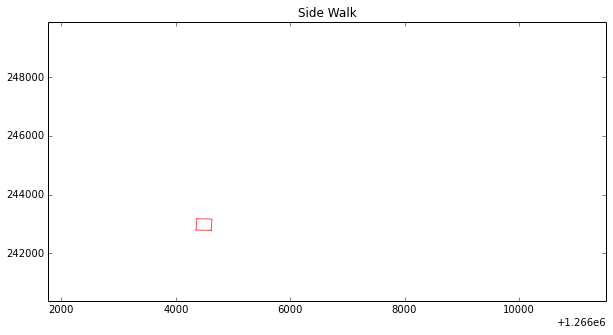

In [6]:

from shapely.geometry import LineString, Polygon, Point
from matplotlib import pyplot
import mpld3
%matplotlib inline
mpld3.enable_notebook()
fig = pyplot.figure(1, figsize=(10,5), dpi=90)
ax = fig.add_subplot(111)
for polygon in sideWalksWhichPolygon:
    for i in range(1,len(polygon)):
        plot_line(ax, polygon[i], "#F90A0A")
    break
# for polygoninfo in streetPolygonList:
#     plot_line(ax, polygoninfo[0], "#0A3EF9")
handle_axesLimTitle_for_lineList(ax, sidewalkLineList, "Side Walk")
# pyplot.show()

In [7]:
for polygon in sideWalksWhichPolygon:
    for i in range(1, len(polygon)):
        for j in range(i+1,len(polygon)):
            print polygon[i], polygon[j]
        

[(1270356.8095961362, 242781.61167496443), (1270368.3581294715, 243180.57478779554)] [(1270621.5006678104, 242766.31380529702), (1270632.4885067195, 243158.00724762678)]
[(1270356.8095961362, 242781.61167496443), (1270368.3581294715, 243180.57478779554)] [(1270360.6754020602, 243174.28641454875), (1270616.9232491404, 243167.31661221385), (1270631.496710807, 243159.69326788187)]
[(1270356.8095961362, 242781.61167496443), (1270368.3581294715, 243180.57478779554)] [(1270350.097011149, 242791.00896587968), (1270628.8986188918, 242776.00013762712)]
[(1270621.5006678104, 242766.31380529702), (1270632.4885067195, 243158.00724762678)] [(1270360.6754020602, 243174.28641454875), (1270616.9232491404, 243167.31661221385), (1270631.496710807, 243159.69326788187)]
[(1270621.5006678104, 242766.31380529702), (1270632.4885067195, 243158.00724762678)] [(1270350.097011149, 242791.00896587968), (1270628.8986188918, 242776.00013762712)]
[(1270360.6754020602, 243174.28641454875), (1270616.9232491404, 243167

In [8]:
import shapely
from shapely.geometry import Point
from shapely.geometry import LineString
from matplotlib import pyplot
%matplotlib inline
from copy import deepcopy

def lenLine(line):
    return Point(line[0]).distance(Point(line[1]))

def cosAndsine(line):
    # cos and sine made with horizon 
    cos = float(line[1][0] - line[0][0])/float(lenLine(line))
    sine = float(line[1][1] - line[0][1])/float(lenLine(line))
    return [cos, sine]

def connectToAvgIfCloseEnough(twoLineList, tolClose):
    lineAfterList = deepcopy(twoLineList)
    for i in range(len(twoLineList[0])):
        for j in range(len(twoLineList[1])):
            if Point(twoLineList[0][i]).distance(Point(twoLineList[1][j])) < tolClose:
                avgX = (twoLineList[0][i][0] + twoLineList[1][j][0])/float(2)
                avgY = (twoLineList[0][i][1] + twoLineList[1][j][1])/float(2)
                lineAfterList[0][i] = (avgX, avgY)
                lineAfterList[1][j] = (avgX, avgY)
    return lineAfterList

def cleanIfintesectedAlready(twoLineList, tolInt, tolClose):
    lines = deepcopy(twoLineList)
    intrsct = LineString(lines[0]).intersection(LineString(lines[1]))
    if intrsct.length == 0:
        for i in range(len(lines)):
            for j in range(len(lines[i])):
                if Point(lines[i][j]).distance(intrsct) < tolInt:
                    lines[i][j] = (intrsct.x, intrsct.y)
        return lines
    else: 
        return connectToAvgIfCloseEnough(lines, tolClose)

def extendLineFromBothSides(line, extL):
    extLine = []
    cosT = cosAndsine(line)[0]
    sinT = cosAndsine(line)[1]
    
    for i in range(len(line)):
        extCoords = (line[i][0] + extL * cosT, line[i][1] + extL * sinT)
        if Point(extCoords).distance(Point(line[abs(i-1)])) < lenLine(line):
            extCoords = (line[i][0] - extL * cosT, line[i][1] - extL * sinT)
        extLine.append(extCoords)
    return extLine

def connectIfintesectedAfterExtending(twoLineList, extL ,tolInt,tolClose):
    lines = deepcopy(twoLineList)
    extLine1 = extendLineFromBothSides(twoLineList[0], extL)
    extLine2 = extendLineFromBothSides(twoLineList[1], extL)
    intrsct = LineString(extLine1).intersection(LineString(extLine2))
    if intrsct.length == 0:
        numDistanceBelowtolInt = 0
        for line in lines:
            for point in line:
                if Point(point).distance(intrsct) < tolInt:
                    numDistanceBelowtolInt += 1
        if numDistanceBelowtolInt > 1:
            for i in range(len(lines)):
                for j in range(len(lines[i])):
                    if Point(lines[i][j]).distance(intrsct) < tolInt:
                        lines[i][j] = (intrsct.x, intrsct.y)
            return lines
        else:
            return connectToAvgIfCloseEnough(lines, tolClose)
    else:
        return connectToAvgIfCloseEnough(lines, tolClose)

def cleanDanglesofAnyKind(twoLineList, extL, tolInt, tolClose):
    extline1 = extendLineFromBothSides(twoLineList[0], extL)
    extline2 = extendLineFromBothSides(twoLineList[1], extL)
    
    if LineString(twoLineList[0]).intersects(LineString(twoLineList[1])) == True:
        return cleanIfintesectedAlready(twoLineList, tolInt, tolClose)
    
    elif LineString(extline1).intersects(LineString(extline2)) == True:
        return connectIfintesectedAfterExtending(twoLineList, extL ,tolInt, tolClose)
    
    else:
        return connectToAvgIfCloseEnough(twoLineList, tolClose)


In [27]:
from copy import deepcopy
sideWalksWhichPolygoncopy = deepcopy(sideWalksWhichPolygon)
print len(sideWalksWhichPolygoncopy)
for i in range(len(sideWalksWhichPolygoncopy)):
    polygon = sideWalksWhichPolygoncopy[i]
    for k in range(1,len(polygon)):
        for j in range(k+1,len(polygon)):
            extL, tolInt, tolClose = 20, 15, 10
            if cleanDanglesofAnyKind([polygon[k], polygon[j]], extL, tolInt, tolClose) != [polygon[k], polygon[j]]:
                if cleanDanglesofAnyKind([polygon[k], polygon[j]], extL, tolInt, tolClose)[0] != polygon[k]:
                    sideWalksWhichPolygoncopy[i][k] = cleanDanglesofAnyKind([polygon[k], polygon[j]], extL, tolInt, tolClose)[0]
                if cleanDanglesofAnyKind([polygon[1], polygon[j]], extL, tolInt, tolClose)[1] != polygon[j]:
                    sideWalksWhichPolygoncopy[i][j] =  cleanDanglesofAnyKind([polygon[k], polygon[j]], extL, tolInt, tolClose)[1]
print k
print sideWalksWhichPolygon[0]
print sideWalksWhichPolygoncopy[0]     
#     for j in range(1,len(polygon)):
#         if cleanDanglesofAnyKind([polygon[1], polygon[j]], 10, 10, 3) != [polygon[1], polygon[j]]:
#             if cleanDanglesofAnyKind([polygon[1], polygon[j]], 10, 10, 3)[0] != polygon[1]:
#                 sideWalksWhichPolygoncopy[]

#             if cleanDanglesofAnyKind([polygon[1], polygon[j]], 10, 10, 3)[1] != polygon[j]:
#                 print j
#     break
# for i in range(0, len(sideWalksWhichPolygoncopy)):
#     polygon = sideWalksWhichPolygoncopy[i]
#     for j in range(1,len(polygon)):
#         if cleanDanglesofAnyKind([polygon[1], polygon[j]], 10, 10, 3) != [polygon[1], polygon[j]]:
#             if cleanDanglesofAnyKind([polygon[1], polygon[j]], 10, 10, 3)[0] != polygon[1]:
#                 sideWalksWhichPolygoncopy[]

#             if cleanDanglesofAnyKind([polygon[1], polygon[j]], 10, 10, 3)[1] != polygon[j]:
#                 print j
#     break

20


AttributeError: 'MultiPoint' object has no attribute 'x'

[0, [(1270356.8095961362, 242781.61167496443), (1270368.3581294715, 243180.57478779554)], [(1270621.5006678104, 242766.31380529702), (1270632.4885067195, 243158.00724762678)], [(1270360.6754020602, 243174.28641454875), (1270616.9232491404, 243167.31661221385), (1270631.496710807, 243159.69326788187)], [(1270350.097011149, 242791.00896587968), (1270628.8986188918, 242776.00013762712)]]
[0, [(1270357.0707465482, 242790.63354624802), (1270368.1702030534, 243174.08256003034)], [(1270621.7698272353, 242776.38390445863), (1270631.9926087633, 243158.85025775433)], [(1270368.1702030534, 243174.08256003034), (1270616.9232491404, 243167.31661221385), (1270631.496710807, 243159.69326788187)], [(1270357.0707465482, 242790.63354624802), (1270628.8986188918, 242776.00013762712)]]


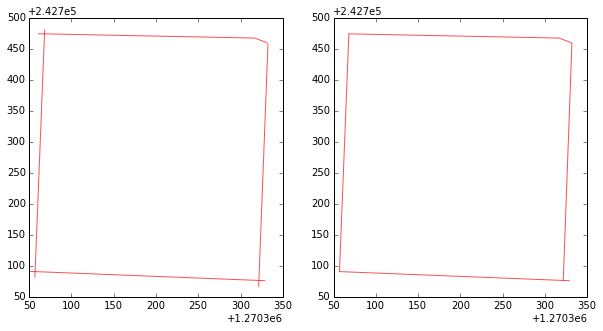

In [26]:
from shapely.geometry import LineString, Polygon, Point
from matplotlib import pyplot
import mpld3
%matplotlib inline
mpld3.enable_notebook()
fig = pyplot.figure(1, figsize=(10,5), dpi=90)
ax = fig.add_subplot(121)
print sideWalksWhichPolygon[0]
for i in range(1,len(sideWalksWhichPolygon[0])):
    plot_line(ax, sideWalksWhichPolygon[0][i], "#F90A0A")

# handle_axesLimTitle_for_lineList(ax, sideWalksWhichPolygon[0], "Side Walk")
print sideWalksWhichPolygoncopy[0]
ax = fig.add_subplot(122)
for i in range(1,len(sideWalksWhichPolygoncopy[0])):
    plot_line(ax, sideWalksWhichPolygoncopy[0][i], "#F90A0A")
# for i in range(1,len(sideWalksWhichPolygoncopy[0])):
#         plot_line(ax, sideWalksWhichPolygoncopy[0][i], "#F90A0A")
# # for polygoninfo in streetPolygonList:
# #     plot_line(ax, polygoninfo[0], "#0A3EF9")
# handle_axesLimTitle_for_lineList(ax, sideWalksWhichPolygoncopy[0], "Side Walk")
# pyplot.show()